### Benjamin Bartek bbartek@my365.bellevue.edu
### DSC 680 Project 1 - NBA Player Performance Metrics and Team Success Analysis

In [1]:
# NBA Player Performance Metrics and Team Success Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
#file_path = '/Documents/Bellevue/NBA Analysis/NBA Analysis2023-2024 NBA Player Stats - Regular.csv'
nba_data = pd.read_csv('2023_2024_NBA_Player_Stats _Regular.csv', encoding='ISO-8859-1', delimiter=';')

# Display dataset structure
nba_data.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF-C,24,TOT,74,18,21.9,3.2,6.3,...,0.616,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6
1,1,Precious Achiuwa,C,24,TOR,25,0,17.5,3.1,6.8,...,0.571,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7
2,1,Precious Achiuwa,PF,24,NYK,49,18,24.2,3.2,6.1,...,0.643,2.9,4.3,7.2,1.1,0.6,1.1,1.1,2.1,7.6
3,2,Bam Adebayo,C,26,MIA,71,71,34.0,7.5,14.3,...,0.755,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3
4,3,Ochai Agbaji,SG,23,TOT,78,28,21.0,2.3,5.6,...,0.661,0.9,1.8,2.8,1.1,0.6,0.6,0.8,1.5,5.8


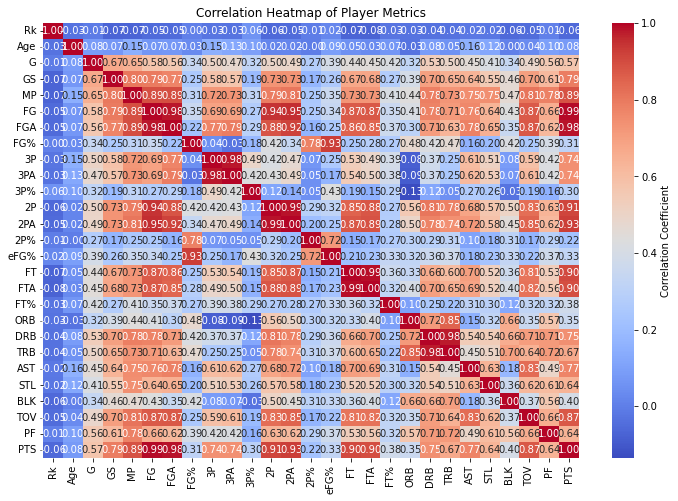

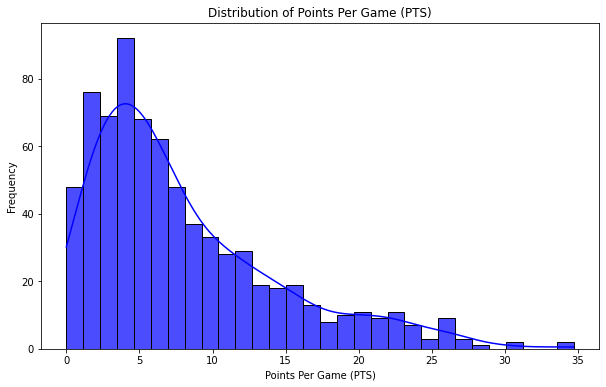

In [2]:
# Descriptive statistics
nba_data.describe(include='all')

# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = nba_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation Heatmap of Player Metrics")
plt.show()

# Distribution plot for Points Per Game (PTS)
plt.figure(figsize=(10, 6))
sns.histplot(nba_data['PTS'].dropna(), kde=True, bins=30, color='blue', alpha=0.7)
plt.title("Distribution of Points Per Game (PTS)")
plt.xlabel("Points Per Game (PTS)")
plt.ylabel("Frequency")
plt.show()

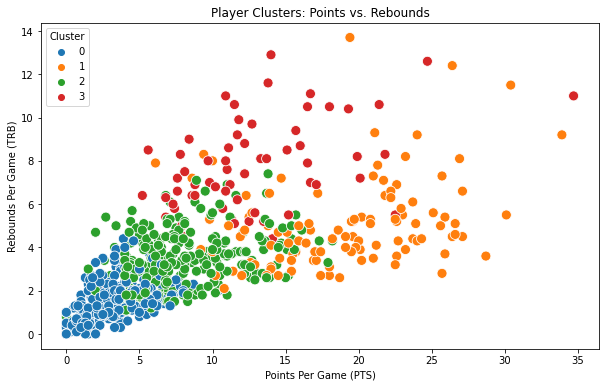

In [3]:
# Prepare data for clustering
performance_metrics = nba_data[['PTS', 'TRB', 'AST', 'STL', 'BLK']].dropna()
scaler = StandardScaler()
scaled_metrics = scaler.fit_transform(performance_metrics)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_metrics)
performance_metrics['Cluster'] = clusters

# Scatter plot for clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(data=performance_metrics, x='PTS', y='TRB', hue='Cluster', palette='tab10', s=100)
plt.title("Player Clusters: Points vs. Rebounds")
plt.xlabel("Points Per Game (PTS)")
plt.ylabel("Rebounds Per Game (TRB)")
plt.legend(title="Cluster")
plt.show()

Mean Squared Error: 9.730379680095738e-30
R^2 Score: 1.0


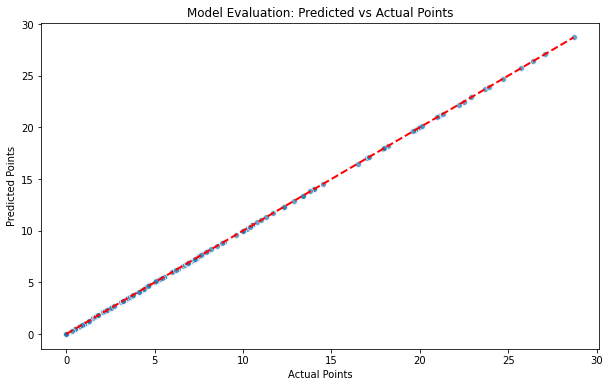

In [4]:
# Prepare data for predictive modeling
features = nba_data[['PTS', 'TRB', 'AST', 'STL', 'BLK']].dropna()
target = nba_data['PTS'].dropna()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

# Visualization: Predicted vs Actual Points
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='w')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Model Evaluation: Predicted vs Actual Points")
plt.xlabel("Actual Points")
plt.ylabel("Predicted Points")
plt.show()